# WMAZE Model 5 Version 2.3.2
## LSS Model
## Removes last 3 noisy volumes (FSL ROI)

In [1]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from glob import glob
from pylab import *

# Learning curve and derivative
### Visually demonstrates which potential target trials are affected by window-related index slicing

81
('WMAZE_003', 'set1')


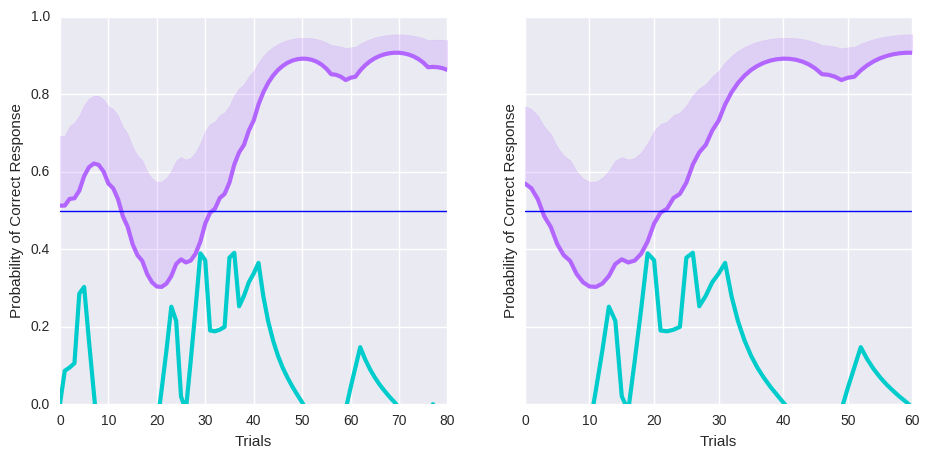

81
('WMAZE_003', 'set2')


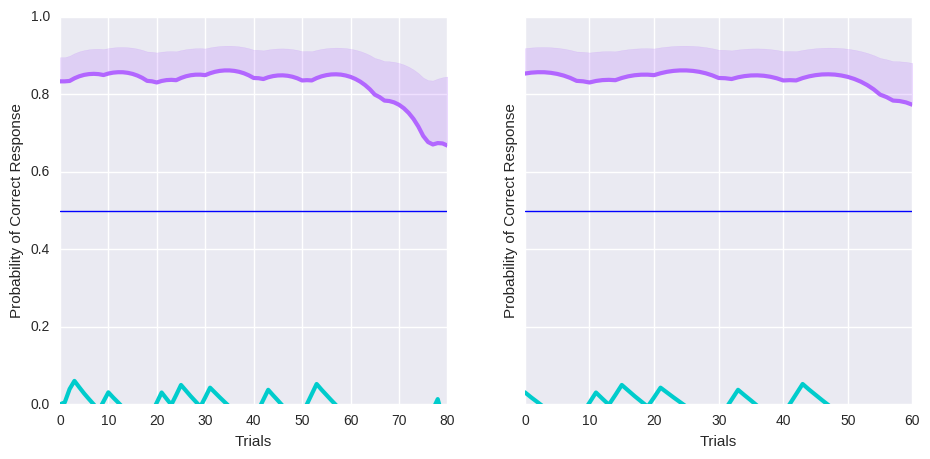

81
('WMAZE_003', 'set3')


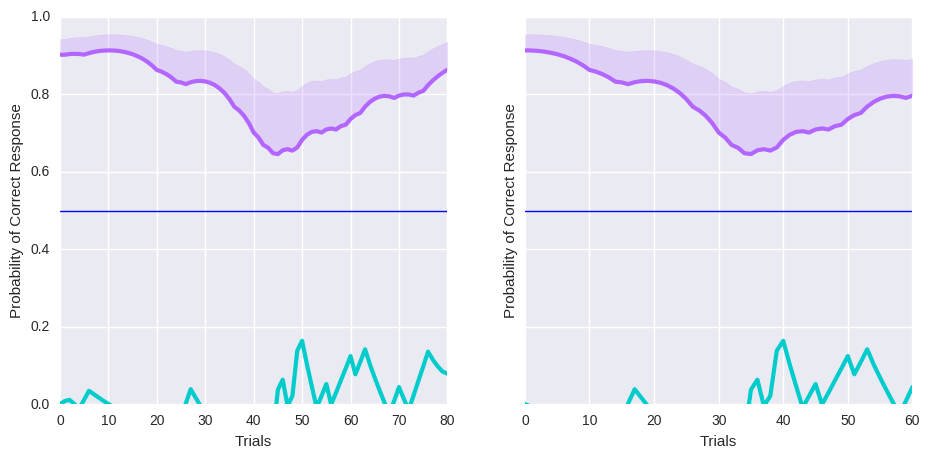

81
('WMAZE_011', 'set1')


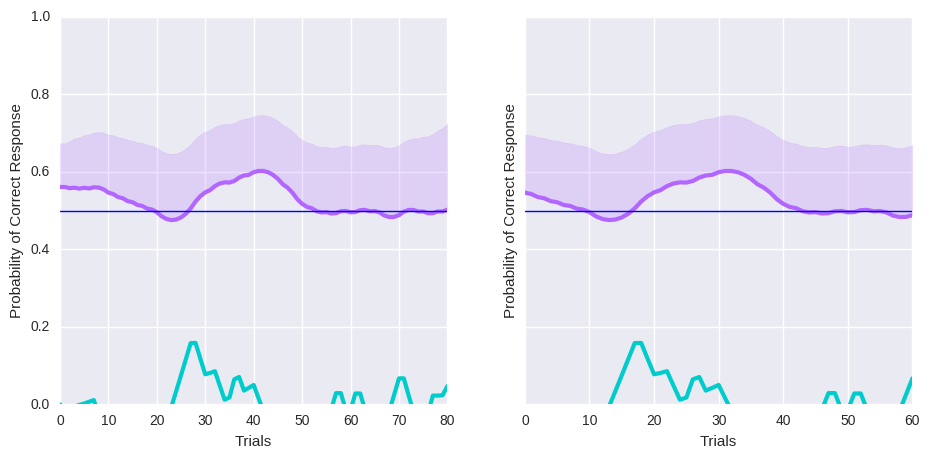

81
('WMAZE_011', 'set2')


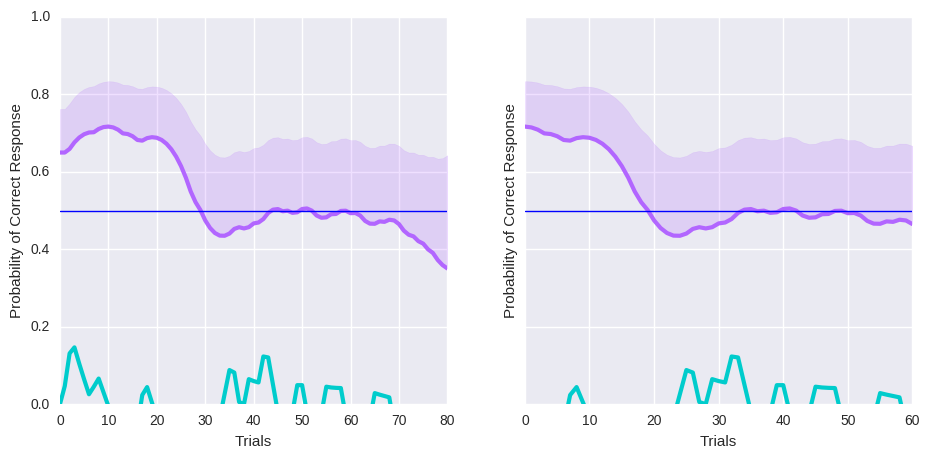

81
('WMAZE_011', 'set3')


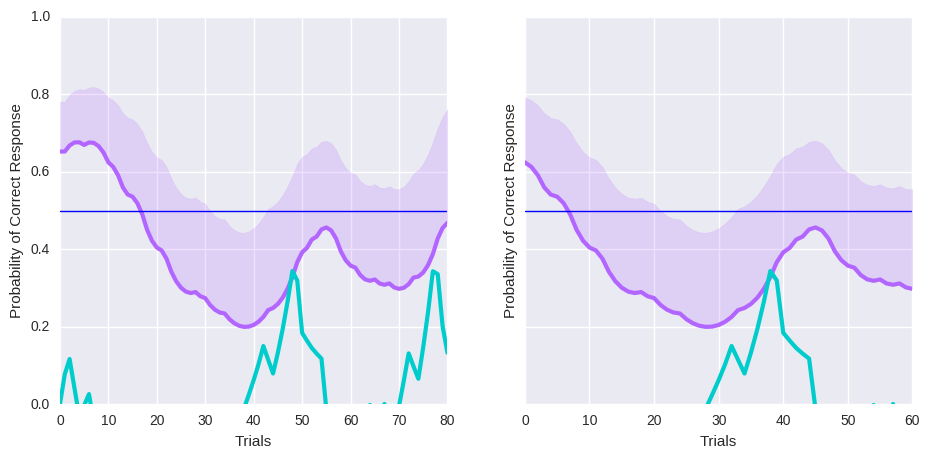

IndexError: list index out of range

In [4]:
import seaborn as sns
#sns.set_style("ticks")
sns.set_palette('muted')
import matplotlib.pyplot as plt


subs = ['WMAZE_003', 'WMAZE_011', 'WMAZE_014', 'WMAZE_015', 'WMAZE_016', 'WMAZE_025']
'''
subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
'''

sets = ['set1', 'set2', 'set3']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    #new derivative files combining behavioral runs into set
    frst_deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    frst_deriv_files.sort()
    upper_95_files = glob(join(sub_dir, 'B_p95_set*.txt'))
    upper_95_files.sort()
    #new learning files combining behavioral runs into set
    learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    learning_files.sort()
    #print learning_curves
    #print frst_deriv_files
    
    for i, curr_set in enumerate(sets):  
        deriv_file = np.loadtxt(frst_deriv_files[i])
        learning_curve = np.loadtxt(learning_files[i])
        upper_95 =np.loadtxt(upper_95_files[i])
        print len(learning_curve)
        
        #plt.plot(deriv_file) #before shaving
        alt_deriv_file = deriv_file[10:-10]
        alt_learning_curve = learning_curve[10:-10]
        alt_upper_95 = upper_95[10:-10]
        #print alt_deriv_file 
        #plt.plot(alt_deriv_file) #after shaving
        target_trial = np.argmax(deriv_file)
        #grabs the index of the largest derivative
        alt_target_trial = np.argmax(alt_deriv_file)+10
        #print target_trial
        #plt.plot(learning_curve)
        
        x = range(len(learning_curve))
        x1 = range(len(alt_learning_curve))
        chance = np.ones(len(x)) * 0.5
        chance1 = np.ones(len(x1)) * 0.5
        

        fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize=(11, 5), sharex = False, sharey = True)  
        ax0.plot(x, learning_curve, "#B266FF", linewidth = 3)
        ax0.plot(x, chance, 'b', linewidth = 1)
        ax0.fill_between(x, learning_curve, upper_95, color = "#B266FF", alpha = 0.2)
        ax0.plot(x, deriv_file, "#00CCCC", linewidth = 3)
        ax0.set_ylim(0,1)
        ax0.set_xlabel('Trials')
        ax0.set_ylabel('Probability of Correct Response')
        
        ax1.plot(x1, alt_learning_curve, "#B266FF", linewidth = 3)
        ax1.plot(x1, chance1, 'b', linewidth = 1)
        ax1.fill_between(x1, alt_learning_curve, alt_upper_95, color = "#B266FF", alpha = 0.2)
        ax1.plot(x1, alt_deriv_file, "#00CCCC", linewidth = 3)
        
        ax1.set_ylim(0,1)
        ax1.set_xlabel('Trials')
        ax1.set_ylabel('Probability of Correct Response')
        
        print(sub, curr_set)
        plt.show()
